In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path="/content/drive/MyDrive/Cardekho_Extract.csv"
df=pd.read_csv(path)
df.describe

<bound method NDFrame.describe of                             Source.Name  ...   seats
0          cardekho_extract(0-2000).csv  ...  Seats5
1          cardekho_extract(0-2000).csv  ...  Seats5
2          cardekho_extract(0-2000).csv  ...  Seats5
3          cardekho_extract(0-2000).csv  ...  Seats5
4          cardekho_extract(0-2000).csv  ...  Seats5
...                                 ...  ...     ...
20021  cardekho_extract(5001-10000).csv  ...  Seats5
20022  cardekho_extract(5001-10000).csv  ...  Seats7
20023  cardekho_extract(5001-10000).csv  ...  Seats5
20024  cardekho_extract(5001-10000).csv  ...  Seats7
20025  cardekho_extract(5001-10000).csv  ...  Seats5

[20026 rows x 16 columns]>

In [ ]:
df.head(5)

,Source.Name,web-scraper-order,web-scraper-start-url,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,cardekho_extract(0-2000).csv,1611917819-1662,https://www.cardekho.com/used-car-details/used...,Maruti Alto Std,1.2 Lakh*,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,cardekho_extract(0-2000).csv,1611918361-1902,https://www.cardekho.com/used-car-details/used...,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,cardekho_extract(0-2000).csv,1611917012-1306,https://www.cardekho.com/used-car-details/used...,Hyundai i20 Asta,2.15 Lakh*,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,cardekho_extract(0-2000).csv,1611917695-1607,https://www.cardekho.com/used-car-details/used...,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,cardekho_extract(0-2000).csv,1611914861-367,https://www.cardekho.com/used-car-details/used...,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [ ]:
## we dont need these and should be dropped
df.drop(['Source.Name','web-scraper-order','web-scraper-start-url','mileage','new-price','max_power','seats'], axis=1, inplace=True)

In [ ]:
#Top 5 rows
df.head(5)

,full_name,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,engine
0,Maruti Alto Std,1.2 Lakh*,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Engine796 CC
1,Hyundai Grand i10 Asta,5.5 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Engine1197 CC
2,Hyundai i20 Asta,2.15 Lakh*,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Engine1197 CC
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Engine998 CC
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Engine1498 CC


In [ ]:
#lets check how many null values we have
df.isnull().sum()

full_name             46
selling_price         46
year                  46
seller_type           46
km_driven             46
owner_type            46
fuel_type             46
transmission_type     46
engine               105
dtype: int64

In [ ]:
## either we can drop full_name also but i would like to change it to name of manufacturer column
fulname = df["full_name"].str.upper()
df['full_name'] = fulname
new = df["full_name"].str.split(" ",n=1,expand=True)

## making separate name column
df["Name"]= new[0]

df.drop('full_name', inplace= True, axis=1)
df.head(5)

,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,engine,Name
0,1.2 Lakh*,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Engine796 CC,MARUTI
1,5.5 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Engine1197 CC,HYUNDAI
2,2.15 Lakh*,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Engine1197 CC,HYUNDAI
3,2.26 Lakh*,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Engine998 CC,MARUTI
4,5.7 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Engine1498 CC,FORD


## Next lets remove the alphabets from alphanumeric strings

In [ ]:
new = df["selling_price"].str.split(" ", n = 1, expand = True)
df["selling_price"]= new[0]

new = df["km_driven"].str.split(" ", n = 1, expand = True)
df["km_driven"]= new[0]

new = df["engine"].str.split("ne", n = 1, expand = True)
df["engine"]= new[1]
new = df["engine"].str.split(" ", n = 1, expand = True)
df["engine"]= new[0]

df.head()

,selling_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,engine,Name
0,1.2,2012.0,Individual,"1,20,000",First Owner,Petrol,Manual,796,MARUTI
1,5.5,2016.0,Individual,"20,000",First Owner,Petrol,Manual,1197,HYUNDAI
2,2.15,2010.0,Individual,"60,000",First Owner,Petrol,Manual,1197,HYUNDAI
3,2.26,2012.0,Individual,"37,000",First Owner,Petrol,Manual,998,MARUTI
4,5.7,2015.0,Dealer,"30,000",First Owner,Diesel,Manual,1498,FORD


### Converting categorical value to numerical values and creating a new df so we can compare

In [ ]:
## converting transmission to boolean
transmission= pd.get_dummies(df['transmission_type'])
newdf= pd.concat([df,transmission],axis=1)
newdf.drop('transmission_type',inplace=True,axis=1)
newdf.head(5)

,selling_price,year,seller_type,km_driven,owner_type,fuel_type,engine,Name,Automatic,Manual
0,1.2,2012.0,Individual,"1,20,000",First Owner,Petrol,796,MARUTI,0,1
1,5.5,2016.0,Individual,"20,000",First Owner,Petrol,1197,HYUNDAI,0,1
2,2.15,2010.0,Individual,"60,000",First Owner,Petrol,1197,HYUNDAI,0,1
3,2.26,2012.0,Individual,"37,000",First Owner,Petrol,998,MARUTI,0,1
4,5.7,2015.0,Dealer,"30,000",First Owner,Diesel,1498,FORD,0,1


In [ ]:
## convert fuel to boolean
fuel = pd.get_dummies(newdf['fuel_type'])
newdf = pd.concat([newdf,fuel],axis=1)
newdf.drop('fuel_type', inplace=True, axis=1)
newdf.head(5)

,selling_price,year,seller_type,km_driven,owner_type,engine,Name,Automatic,Manual,CNG,Diesel,Electric,LPG,Petrol
0,1.2,2012.0,Individual,"1,20,000",First Owner,796,MARUTI,0,1,0,0,0,0,1
1,5.5,2016.0,Individual,"20,000",First Owner,1197,HYUNDAI,0,1,0,0,0,0,1
2,2.15,2010.0,Individual,"60,000",First Owner,1197,HYUNDAI,0,1,0,0,0,0,1
3,2.26,2012.0,Individual,"37,000",First Owner,998,MARUTI,0,1,0,0,0,0,1
4,5.7,2015.0,Dealer,"30,000",First Owner,1498,FORD,0,1,0,1,0,0,0


In [ ]:
seller = pd.get_dummies(newdf['seller_type'])
newdf = pd.concat([newdf,seller],axis=1)
newdf.drop('seller_type', inplace=True, axis=1)

owner = pd.get_dummies(newdf['owner_type'])
newdf = pd.concat([newdf,owner],axis=1)
newdf.drop('owner_type', inplace=True, axis=1)

newdf.head(5)



,selling_price,year,km_driven,engine,Name,Automatic,Manual,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer,First Owner,Second Owner,Third Owner
0,1.2,2012.0,"1,20,000",796,MARUTI,0,1,0,0,0,0,1,0,1,0,1,0,0
1,5.5,2016.0,"20,000",1197,HYUNDAI,0,1,0,0,0,0,1,0,1,0,1,0,0
2,2.15,2010.0,"60,000",1197,HYUNDAI,0,1,0,0,0,0,1,0,1,0,1,0,0
3,2.26,2012.0,"37,000",998,MARUTI,0,1,0,0,0,0,1,0,1,0,1,0,0
4,5.7,2015.0,"30,000",1498,FORD,0,1,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
newdf.dtypes

selling_price        object
year                float64
km_driven            object
engine               object
Name                 object
Automatic             uint8
Manual                uint8
CNG                   uint8
Diesel                uint8
Electric              uint8
LPG                   uint8
Petrol                uint8
Dealer                uint8
Individual            uint8
Trustmark Dealer      uint8
First Owner           uint8
Second Owner          uint8
Third Owner           uint8
dtype: object

In [ ]:
newdf['selling_price'] = newdf['selling_price'].astype(str)
SP = []
for m in newdf['selling_price']:
    if "*" in m :
        m =float(m.replace(',', '').replace('*', ''))/100000
    SP.append(float(m))
newdf['selling_price'] = SP
newdf.head(5)

,selling_price,year,km_driven,engine,Name,Automatic,Manual,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer,First Owner,Second Owner,Third Owner
0,1.20,2012.0,"1,20,000",796,MARUTI,0,1,0,0,0,0,1,0,1,0,1,0,0
1,5.50,2016.0,"20,000",1197,HYUNDAI,0,1,0,0,0,0,1,0,1,0,1,0,0
2,2.15,2010.0,"60,000",1197,HYUNDAI,0,1,0,0,0,0,1,0,1,0,1,0,0
3,2.26,2012.0,"37,000",998,MARUTI,0,1,0,0,0,0,1,0,1,0,1,0,0
4,5.70,2015.0,"30,000",1498,FORD,0,1,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20026 entries, 0 to 20025
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19980 non-null  float64
 1   year              19980 non-null  float64
 2   km_driven         19980 non-null  object 
 3   engine            19877 non-null  object 
 4   Name              19980 non-null  object 
 5   Automatic         20026 non-null  uint8  
 6   Manual            20026 non-null  uint8  
 7   CNG               20026 non-null  uint8  
 8   Diesel            20026 non-null  uint8  
 9   Electric          20026 non-null  uint8  
 10  LPG               20026 non-null  uint8  
 11  Petrol            20026 non-null  uint8  
 12  Dealer            20026 non-null  uint8  
 13  Individual        20026 non-null  uint8  
 14  Trustmark Dealer  20026 non-null  uint8  
 15  First Owner       20026 non-null  uint8  
 16  Second Owner      20026 non-null  uint8 

In [ ]:
newdf['km_driven'] = newdf['km_driven'].astype(str)
KM = []
for m in newdf['km_driven']:
    KM.append(m.replace(',', ''))
newdf['km_driven'] = KM
newdf.head(5)

,selling_price,year,km_driven,engine,Name,Automatic,Manual,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer,First Owner,Second Owner,Third Owner
0,1.20,2012.0,120000,796,MARUTI,0,1,0,0,0,0,1,0,1,0,1,0,0
1,5.50,2016.0,20000,1197,HYUNDAI,0,1,0,0,0,0,1,0,1,0,1,0,0
2,2.15,2010.0,60000,1197,HYUNDAI,0,1,0,0,0,0,1,0,1,0,1,0,0
3,2.26,2012.0,37000,998,MARUTI,0,1,0,0,0,0,1,0,1,0,1,0,0
4,5.70,2015.0,30000,1498,FORD,0,1,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
newdf.isnull().sum()

selling_price        46
year                 46
km_driven             0
engine              149
Name                 46
Automatic             0
Manual                0
CNG                   0
Diesel                0
Electric              0
LPG                   0
Petrol                0
Dealer                0
Individual            0
Trustmark Dealer      0
First Owner           0
Second Owner          0
Third Owner           0
dtype: int64

In [ ]:
## we replace the null values of selling price column with its mean
newdf['selling_price'].fillna((newdf['selling_price'].mean()),inplace=True)


In [ ]:
## we replace the null values of year column with its mean
newdf['year'].fillna((newdf['year'].mean()),inplace=True)

In [ ]:
## converting engine column to float from object and replacing its null values with its mean
newdf['engine'] = pd.to_numeric(newdf['engine'], downcast="float")
newdf['engine'].fillna((newdf['engine'].mean()),inplace=True)

In [ ]:
newdf.isnull().sum()

selling_price        0
year                 0
km_driven            0
engine               0
Name                46
Automatic            0
Manual               0
CNG                  0
Diesel               0
Electric             0
LPG                  0
Petrol               0
Dealer               0
Individual           0
Trustmark Dealer     0
First Owner          0
Second Owner         0
Third Owner          0
dtype: int64

In [ ]:
## we should not assume any value to name, so we can drop the rows in which name column has null values 
newdf.dropna(inplace=True)

In [ ]:
#As we can see, we have now 0 null values and our data is almost ready
newdf.isnull().sum()

selling_price       0
year                0
km_driven           0
engine              0
Name                0
Automatic           0
Manual              0
CNG                 0
Diesel              0
Electric            0
LPG                 0
Petrol              0
Dealer              0
Individual          0
Trustmark Dealer    0
First Owner         0
Second Owner        0
Third Owner         0
dtype: int64

In [ ]:
df.describe

<bound method NDFrame.describe of       selling_price    year seller_type  ... transmission_type engine      Name
0               1.2  2012.0  Individual  ...            Manual    796    MARUTI
1               5.5  2016.0  Individual  ...            Manual   1197   HYUNDAI
2              2.15  2010.0  Individual  ...            Manual   1197   HYUNDAI
3              2.26  2012.0  Individual  ...            Manual    998    MARUTI
4               5.7  2015.0      Dealer  ...            Manual   1498      FORD
...             ...     ...         ...  ...               ...    ...       ...
20021           6.5  2017.0      Dealer  ...            Manual   1364    TOYOTA
20022          9.25  2019.0      Dealer  ...            Manual   1373    MARUTI
20023          4.25  2015.0      Dealer  ...            Manual   1498     SKODA
20024         12.25  2016.0      Dealer  ...            Manual   2179  MAHINDRA
20025            12  2019.0      Dealer  ...         Automatic   1497     HONDA

[2002

In [ ]:
newdf.describe

<bound method NDFrame.describe of        selling_price    year km_driven  ...  First Owner Second Owner  Third Owner
0               1.20  2012.0    120000  ...            1            0            0
1               5.50  2016.0     20000  ...            1            0            0
2               2.15  2010.0     60000  ...            1            0            0
3               2.26  2012.0     37000  ...            1            0            0
4               5.70  2015.0     30000  ...            1            0            0
...              ...     ...       ...  ...          ...          ...          ...
20021           6.50  2017.0     69480  ...            1            0            0
20022           9.25  2019.0     18000  ...            1            0            0
20023           4.25  2015.0     67000  ...            1            0            0
20024          12.25  2016.0   3800000  ...            1            0            0
20025          12.00  2019.0     13000  ...          

In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19980 entries, 0 to 20025
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19980 non-null  float64
 1   year              19980 non-null  float64
 2   km_driven         19980 non-null  object 
 3   engine            19980 non-null  float32
 4   Name              19980 non-null  object 
 5   Automatic         19980 non-null  uint8  
 6   Manual            19980 non-null  uint8  
 7   CNG               19980 non-null  uint8  
 8   Diesel            19980 non-null  uint8  
 9   Electric          19980 non-null  uint8  
 10  LPG               19980 non-null  uint8  
 11  Petrol            19980 non-null  uint8  
 12  Dealer            19980 non-null  uint8  
 13  Individual        19980 non-null  uint8  
 14  Trustmark Dealer  19980 non-null  uint8  
 15  First Owner       19980 non-null  uint8  
 16  Second Owner      19980 non-null  uint8 

In [ ]:
# it seems we still had the km driven column as object, so we must change it to float
newdf['km_driven']=newdf.km_driven.astype(float)

In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19980 entries, 0 to 20025
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19980 non-null  float64
 1   year              19980 non-null  float64
 2   km_driven         19980 non-null  float64
 3   engine            19980 non-null  float32
 4   Name              19980 non-null  object 
 5   Automatic         19980 non-null  uint8  
 6   Manual            19980 non-null  uint8  
 7   CNG               19980 non-null  uint8  
 8   Diesel            19980 non-null  uint8  
 9   Electric          19980 non-null  uint8  
 10  LPG               19980 non-null  uint8  
 11  Petrol            19980 non-null  uint8  
 12  Dealer            19980 non-null  uint8  
 13  Individual        19980 non-null  uint8  
 14  Trustmark Dealer  19980 non-null  uint8  
 15  First Owner       19980 non-null  uint8  
 16  Second Owner      19980 non-null  uint8 

In [ ]:
## just adding an age column which will denote the age of vehicle
newdf['current year']=2022

In [ ]:
newdf['age']=newdf['current year']-newdf['year']

In [ ]:
newdf.drop(['year','current year'], axis=1, inplace=True)

In [ ]:
newdf.head(5)

,selling_price,km_driven,engine,Name,Automatic,Manual,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer,First Owner,Second Owner,Third Owner,age
0,1.20,120000.0,796.0,MARUTI,0,1,0,0,0,0,1,0,1,0,1,0,0,10.0
1,5.50,20000.0,1197.0,HYUNDAI,0,1,0,0,0,0,1,0,1,0,1,0,0,6.0
2,2.15,60000.0,1197.0,HYUNDAI,0,1,0,0,0,0,1,0,1,0,1,0,0,12.0
3,2.26,37000.0,998.0,MARUTI,0,1,0,0,0,0,1,0,1,0,1,0,0,10.0
4,5.70,30000.0,1498.0,FORD,0,1,0,1,0,0,0,1,0,0,1,0,0,7.0


In [ ]:
import seaborn as sns

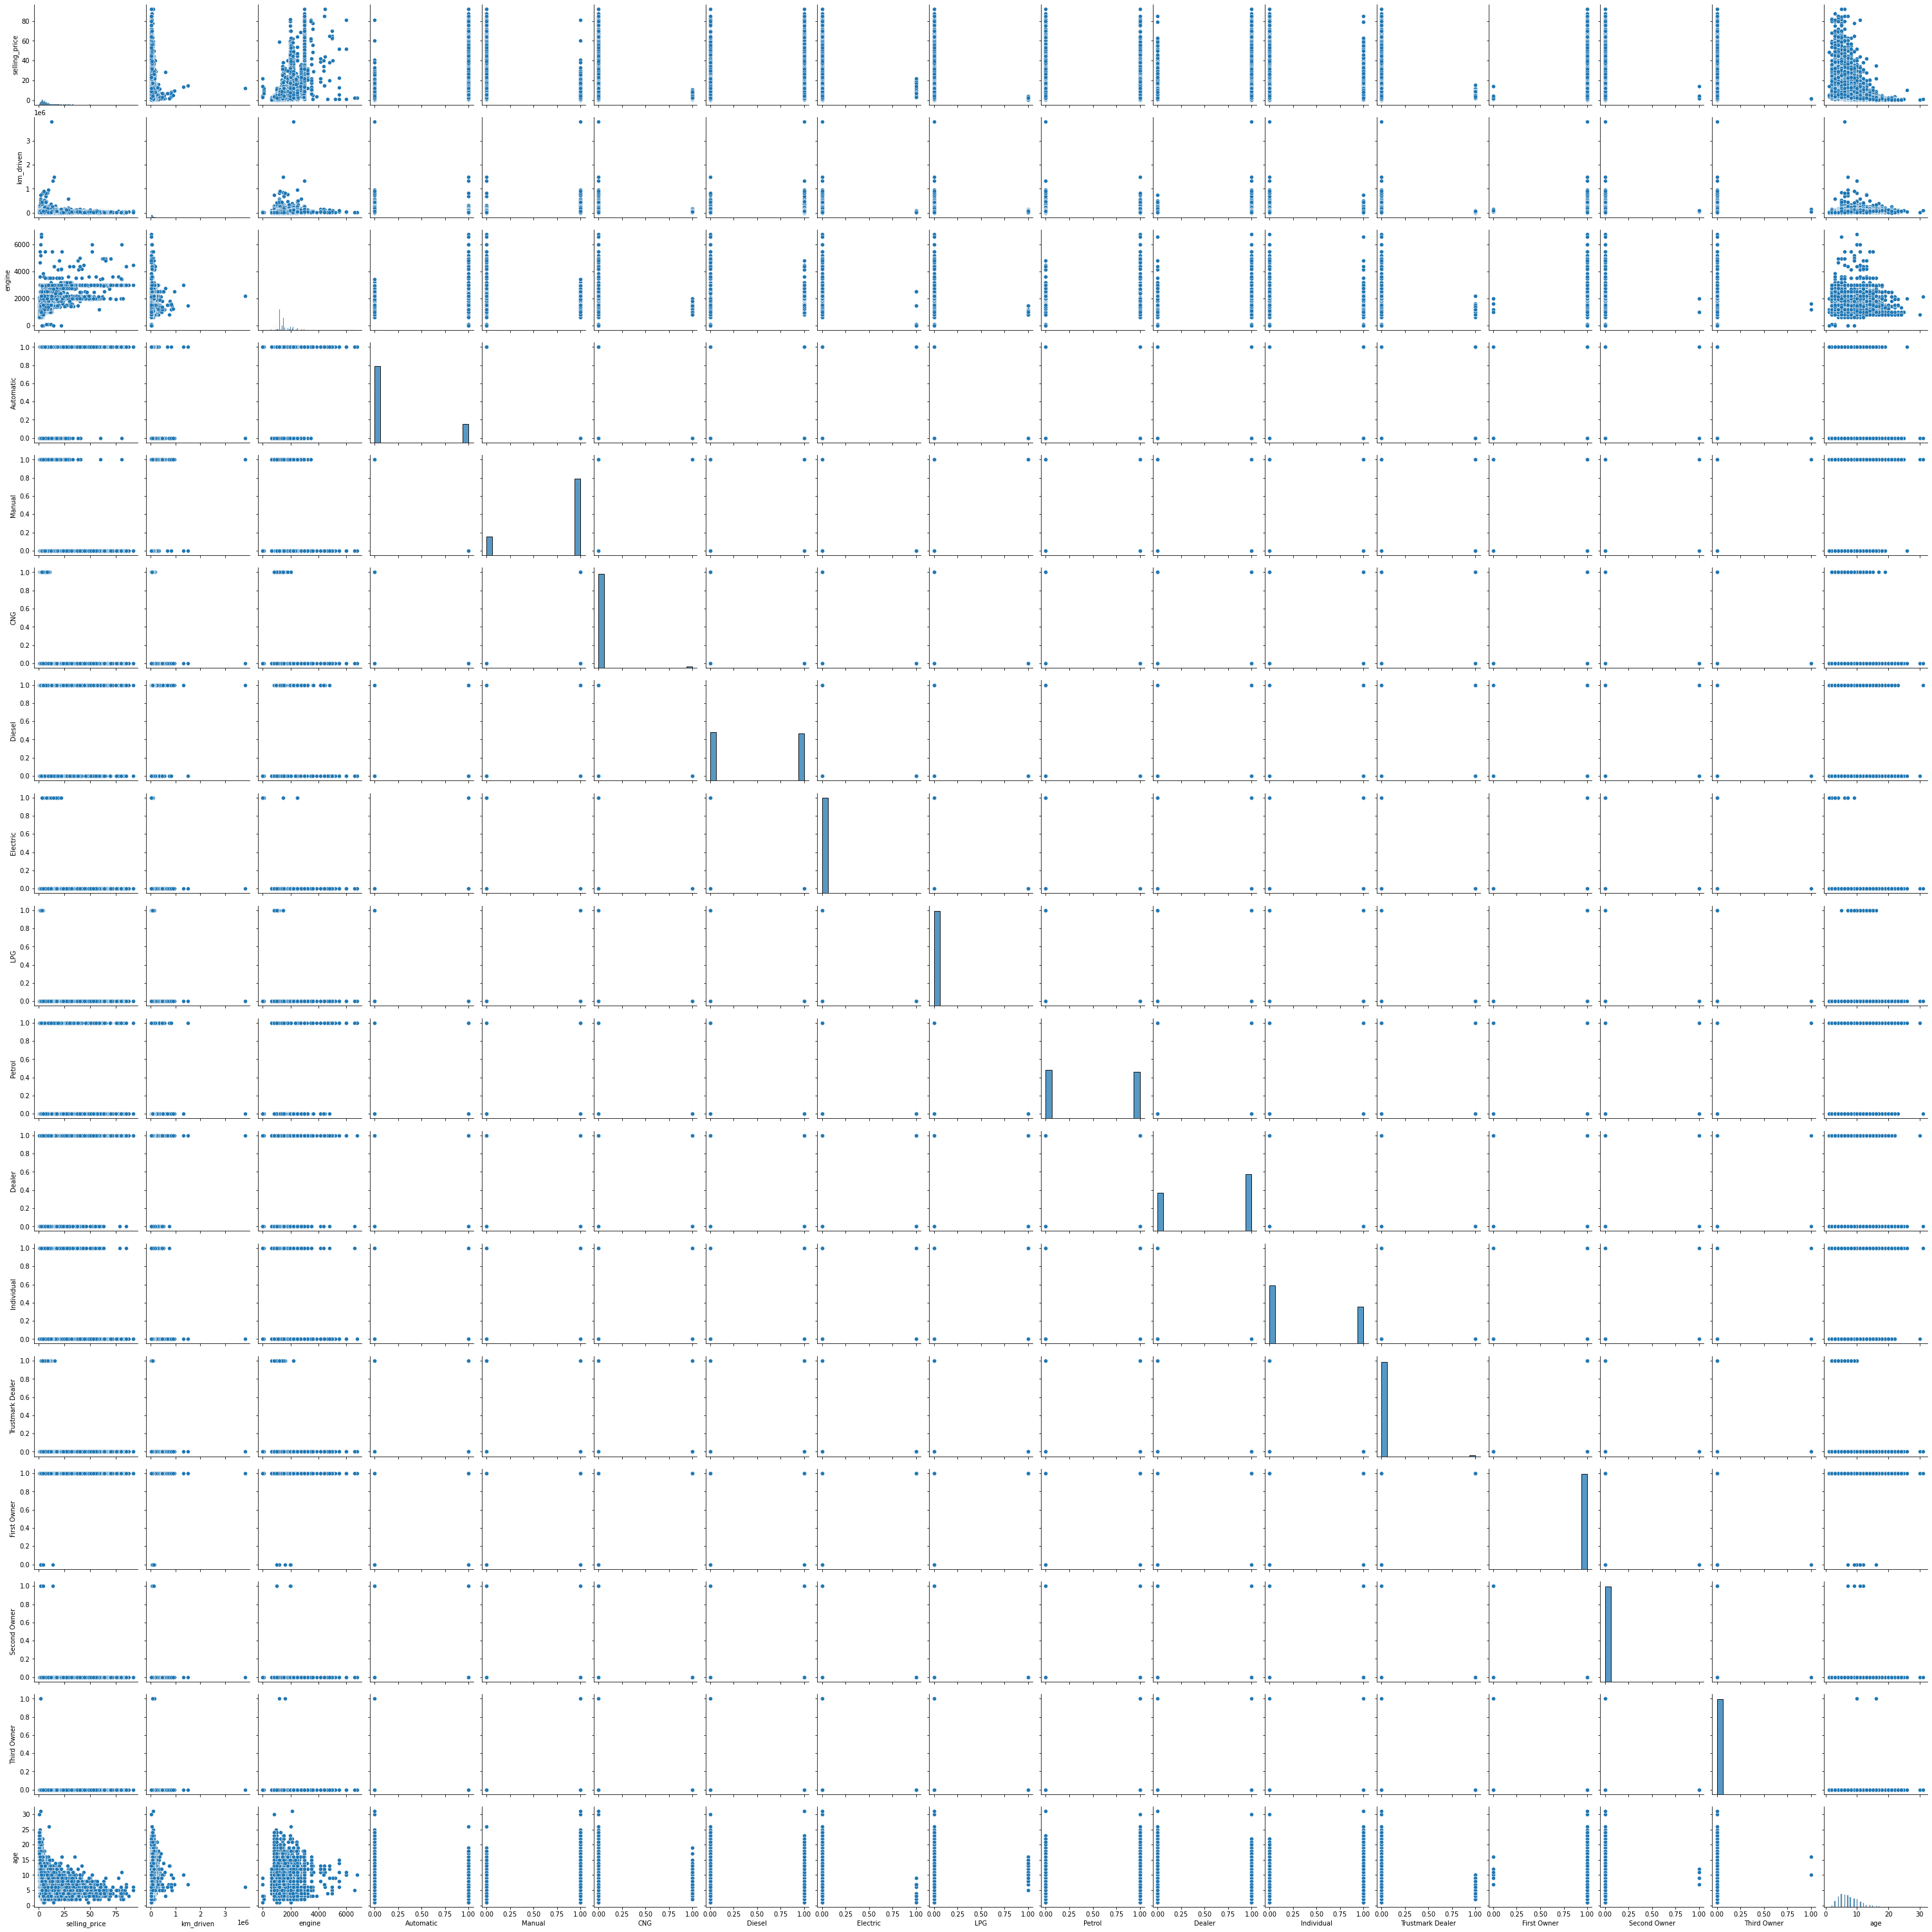

In [ ]:
## lets make a pairplot to check the various type of co-relations that exist in our data sets
sns.pairplot(newdf)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

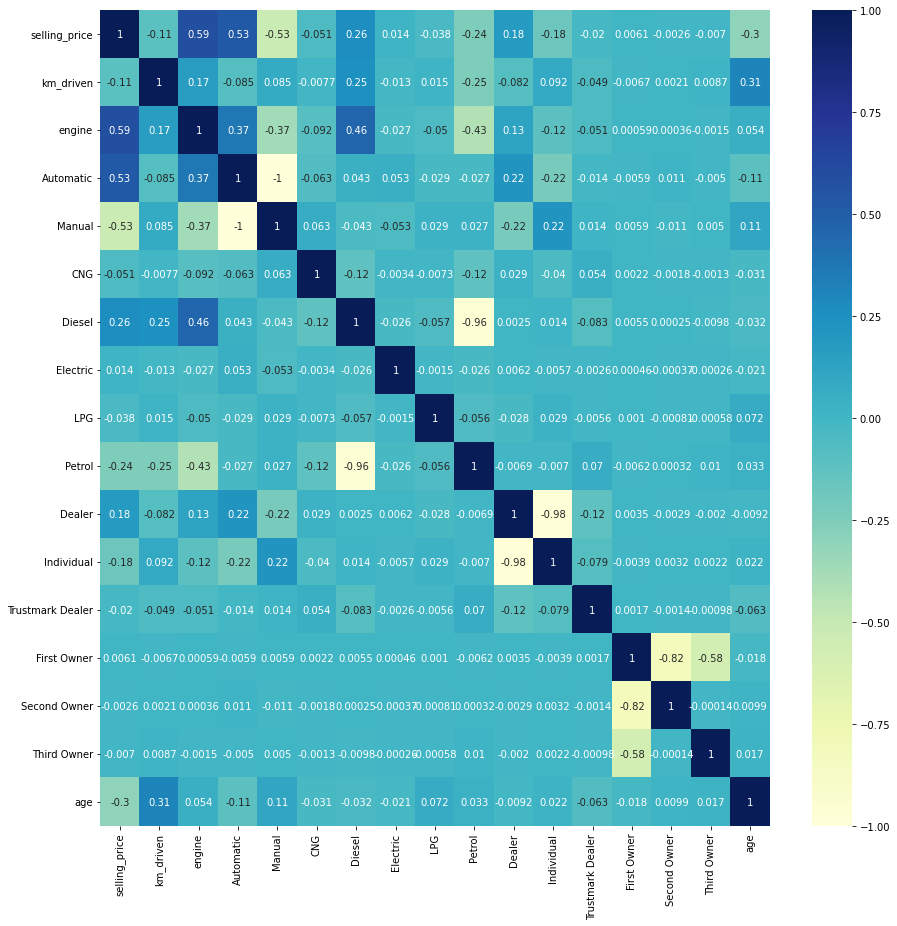

In [ ]:
## it seems little tough to visulaise so many pair plots, now lets try to visualise it through heat map
corrmat=newdf.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))
## heatmap code https://seaborn.pydata.org/generated/seaborn.heatmap.html
g=sns.heatmap(newdf[top_corr_features].corr(),annot=True,cmap="YlGnBu")

**If we observe the heat map carefully, we see many interesting findings**

selling price which is our target variable is highly correlated with engine capacity , automatic transmission, and diesel vehicle


**means that these features impact the selling price of vehicle positively, an automatic vehicle fetches better price than a manual, similarly a higher capacity engine is worth more in the market, and diesel vehicle will fetch a better price than its petrol counterpart**

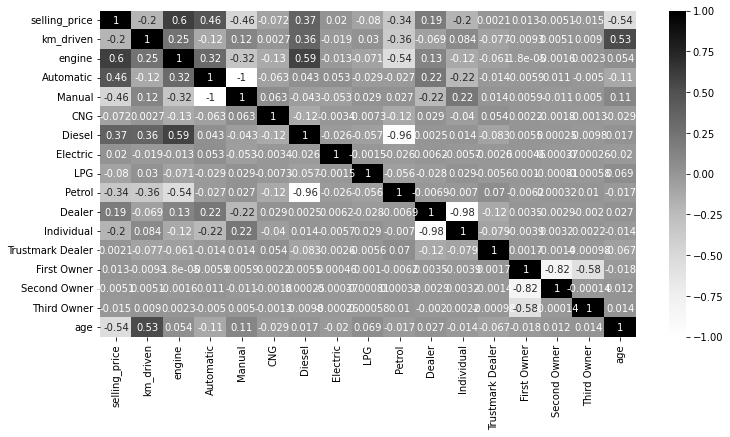

In [ ]:
## lets once check the spearman correlation
plt.figure(figsize=(12,6))
sns.heatmap(newdf.corr(method='spearman'),annot=True, cmap='Greys')

**Here we see that a strong negative correlation is between selling price and killometers driven by a car, age of the vehicle, and transmission as selling price of a manual vehicle is prety less,similary a higher mileage car is fetching less price, and same is the case with age, higher the age of vehicle, lesser is its price. we should try to see these relations with selling price more graphically to get more clarity**

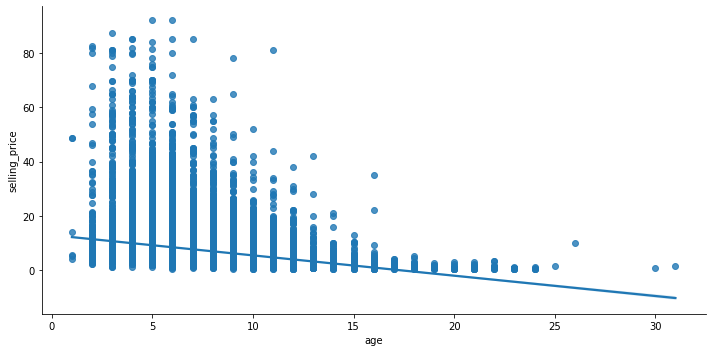

In [ ]:
sns.lmplot(x='age',y='selling_price',data=newdf,aspect=2,height=5)

**We can clearly see an inverse relation of age with selling price, as selling price keeps reducing as age is increasing**

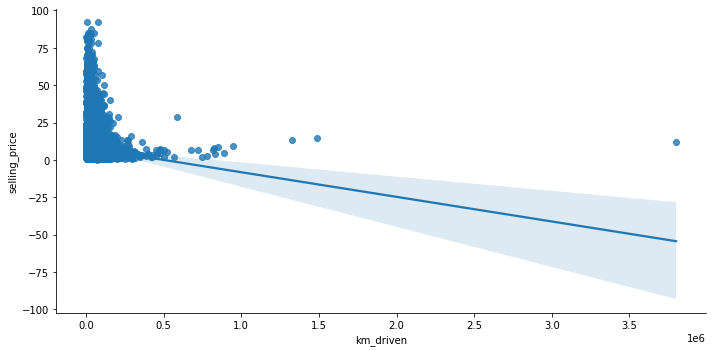

In [ ]:
sns.lmplot(x='km_driven',y='selling_price',data=newdf,aspect=2,height=5)

**Same trend can be observed here as well but not very significant, age feature has a much bigger impact on price than mileage**

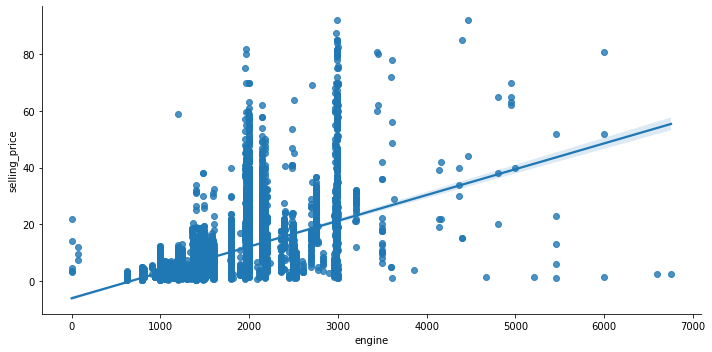

In [ ]:
sns.lmplot(x='engine',y='selling_price',data=newdf,aspect=2,height=5)

**Engine capacity directly impacts the price here, but after 3000cc it does not have much impact, as above 3000 cc its the sports car territory, where the customers are limited and are not bothered about the engine capacity of their sports car**

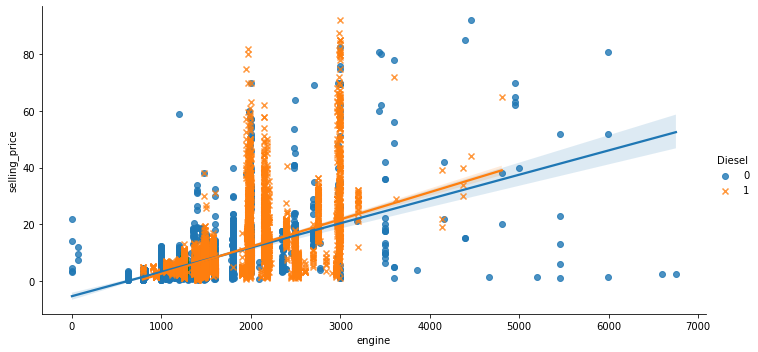

In [ ]:
sns.lmplot(x='engine',y='selling_price',data=newdf,aspect=2,height=5,hue='Diesel',markers=['o','x'])

**Here we can clearly see that a high capacity diesel engine has been in much more demand in the used car market which effects the selling price positively**

In [ ]:
newdf.head(5)

,selling_price,km_driven,engine,Name,Automatic,Manual,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer,First Owner,Second Owner,Third Owner,age
0,1.20,120000.0,796.0,MARUTI,0,1,0,0,0,0,1,0,1,0,1,0,0,10.0
1,5.50,20000.0,1197.0,HYUNDAI,0,1,0,0,0,0,1,0,1,0,1,0,0,6.0
2,2.15,60000.0,1197.0,HYUNDAI,0,1,0,0,0,0,1,0,1,0,1,0,0,12.0
3,2.26,37000.0,998.0,MARUTI,0,1,0,0,0,0,1,0,1,0,1,0,0,10.0
4,5.70,30000.0,1498.0,FORD,0,1,0,1,0,0,0,1,0,0,1,0,0,7.0


In [ ]:
newdf.drop(['Name'], axis=1, inplace=True)

In [ ]:
## lets split our data into dependent and independent features
X=newdf.iloc[:,1:]
y=newdf.iloc[:,0]

In [ ]:
X.head()

,km_driven,engine,Automatic,Manual,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Trustmark Dealer,First Owner,Second Owner,Third Owner,age
0,120000.0,796.0,0,1,0,0,0,0,1,0,1,0,1,0,0,10.0
1,20000.0,1197.0,0,1,0,0,0,0,1,0,1,0,1,0,0,6.0
2,60000.0,1197.0,0,1,0,0,0,0,1,0,1,0,1,0,0,12.0
3,37000.0,998.0,0,1,0,0,0,0,1,0,1,0,1,0,0,10.0
4,30000.0,1498.0,0,1,0,1,0,0,0,1,0,0,1,0,0,7.0


In [ ]:
y.head()

0    1.20
1    5.50
2    2.15
3    2.26
4    5.70
Name: selling_price, dtype: float64

In [ ]:
## Feature importance 
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[1.13794718e-01 3.52190498e-01 1.66370867e-01 1.08750717e-01
 9.15893809e-05 7.42840858e-02 8.89570007e-05 1.63545154e-05
 1.62191564e-03 5.44187898e-03 6.05981179e-03 5.85486260e-05
 7.24606477e-06 7.13546196e-06 4.63612109e-07 1.71215213e-01]


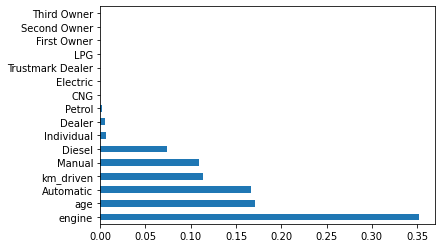

In [ ]:
## plotting graph for the feature importance 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

**Well we can clearly see in the graph that the most important 6 features are engine, age, manual or automatic, km driven, and diesel vehicle, so rest all the features we basically dont need in our model**

In [ ]:
newdf.drop(['Dealer','Individual','Petrol','Electric','CNG','Trustmark Dealer','LPG','Second Owner','First Owner','Third Owner'], axis=1, inplace=True)

In [ ]:
newdf.head()

,selling_price,km_driven,engine,Automatic,Manual,Diesel,age
0,1.20,120000.0,796.0,0,1,0,10.0
1,5.50,20000.0,1197.0,0,1,0,6.0
2,2.15,60000.0,1197.0,0,1,0,12.0
3,2.26,37000.0,998.0,0,1,0,10.0
4,5.70,30000.0,1498.0,0,1,1,7.0


In [ ]:
X=newdf.iloc[:,1:]
y=newdf.iloc[:,0]

In [ ]:
X.head() 
## now we have all the relevant features

,km_driven,engine,Automatic,Manual,Diesel,age
0,120000.0,796.0,0,1,0,10.0
1,20000.0,1197.0,0,1,0,6.0
2,60000.0,1197.0,0,1,0,12.0
3,37000.0,998.0,0,1,0,10.0
4,30000.0,1498.0,0,1,1,7.0


In [ ]:
y.head()

0    1.20
1    5.50
2    2.15
3    2.26
4    5.70
Name: selling_price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

**We will try different regression techniques to check the accuracy of each one. The technique which best fits the data , we will implement it from scratch**

**1: Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
## lets check cv score 
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,X_train,y_train,cv=5,scoring='r2')
print('CV Mean: ', np.mean(scores))
print('STD: ', np.std(scores))

CV Mean:  0.5499879274293252
STD:  0.02098550087703452


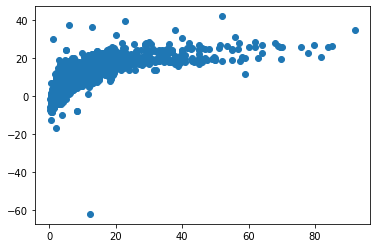

In [ ]:
h = lr.predict(X_test)
plt.scatter(y_test,h)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


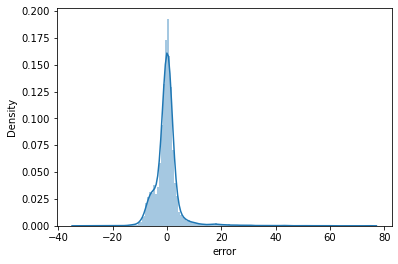

In [ ]:
sns.distplot((y_test-h),bins=150,axlabel = "error")

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, h))
print('MSE:', metrics.mean_squared_error(y_test, h))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, h)))
print('Model Accuracy:',lr.score(X_test, y_test)*100,'%')

MAE: 2.8685571875969864
MSE: 30.118231253963845
RMSE: 5.488007949517187
Model Accuracy: 53.81545830886483 %


**Not getting Good results with linear regression**

**2: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [ ]:
## Hyperparameters
## we will circle through different parameters for our trees
n_estimators = [int(x) for x in np.linspace(start=100,stop=1300, num=11)]
print(n_estimators)

[100, 220, 340, 460, 580, 700, 820, 940, 1060, 1180, 1300]


In [ ]:
rf_random.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
predictions=rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


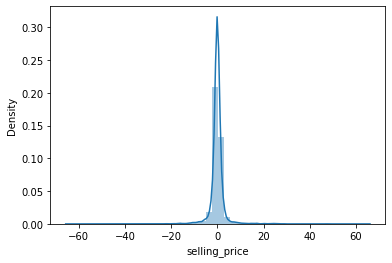

In [ ]:
sns.distplot(y_test-predictions)

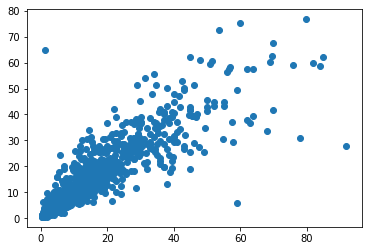

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df

,Actual,Predicted
4022,2.70,1.782600
2092,9.51,10.151500
4780,7.50,6.746733
10652,19.00,11.397351
15472,12.75,14.304767
...,...,...
13979,6.75,8.405800
19653,1.20,1.287361
5355,2.91,2.700837
19501,6.51,6.528367


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.4763877746975786
Mean Squared Error: 11.20863114444786
Root Mean Squared Error: 3.3479293816399203


In [ ]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.48 degrees.
Accuracy: 82.34 %.


**We have reached an approximate 80 percent accuracy here, in the next phase we will try to fine tune and try some other models to see if we can improve on our accuracy**

**3: XGBoost Regression**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg_reg=XGBRegressor()

In [ ]:
xg_reg.fit(X_train,y_train)

[10:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred=xg_reg.predict(X_test)

In [ ]:
y_pred

array([ 2.6788568, 10.703831 ,  6.6694684, ...,  2.2996194,  6.136638 ,
        1.4247425], dtype=float32)

In [ ]:
difference = y_test - y_pred

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


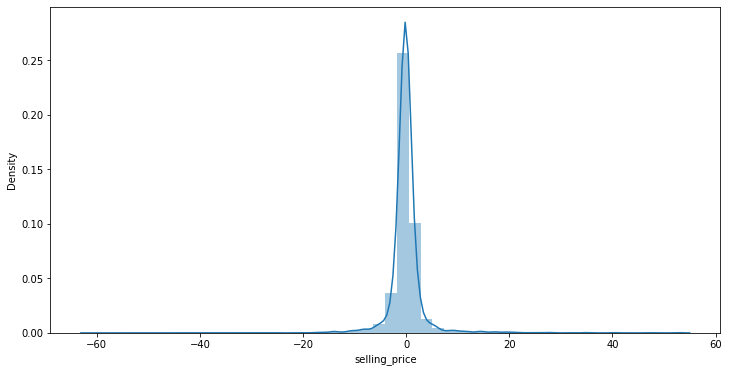

In [ ]:
plt.figure(figsize= (12,6))
sns.distplot(difference)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.6326354949191095
Mean Squared Error: 12.571552425069207
Root Mean Squared Error: 3.5456385073875207


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model= XGBRegressor(objective="reg:squarederror")

In [ ]:
scores = cross_val_score(model, X, y,
                         scoring = "neg_mean_squared_error",
                         cv=10)

In [ ]:
scores

array([-16.72258769, -12.879534  , -13.15327242,  -7.33598788,
        -9.43653097,  -6.11804584, -23.55500705, -15.30221987,
       -11.56557937,  -9.98103339])

In [ ]:
rmse=np.sqrt(-scores)

In [ ]:
print(rmse)
# with CV we rached a minimum RMSE of 2.47 , earlier we had an rmse of 3.3, so CV helped us reducing it

[4.08932607 3.58880677 3.62674405 2.70850288 3.07189371 2.47346838
 4.85335009 3.91180519 3.4008204  3.15927735]


In [ ]:
xg_reg.score(X_test,y_test)*100
#result on testing 

80.72226147006936

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
4022,2.70,2.678857
2092,9.51,10.703831
4780,7.50,6.669468
10652,19.00,14.245301
15472,12.75,14.039997
...,...,...
13979,6.75,7.060275
19653,1.20,2.486934
5355,2.91,2.299619
19501,6.51,6.136638


In [ ]:
xgberrors = abs(y_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape_xgb = 100 * (xgberrors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape_xgb)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 74.16 %.


**Both Random forest and XGB regressor gave us good results but random forest has been a comparitively better**